In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv

In [2]:
# train = np.genfromtxt('train.csv', delimiter=',', dtype=None)
# test = np.genfromtxt('test.csv', delimiter=',', dtype=None)
df = pd.read_csv("train.csv")

In [3]:
print(df.shape)

(318438, 18)


In [4]:
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449,11-20
1,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
2,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056,31-40
3,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167,0-10
4,12,26,b,2,Y,4,radiotherapy,R,D,1.0,31397,7.0,Urgent,Extreme,2,51-60,5993,11-20
5,11,22,g,9,Y,2,radiotherapy,S,B,2.0,31397,7.0,Urgent,Extreme,2,51-60,5797,21-30
6,14,9,d,5,Z,3,radiotherapy,S,F,3.0,31397,7.0,Urgent,Extreme,2,51-60,8477,21-30
7,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
8,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
9,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10


In [5]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
print(df['City_Code_Patient'].unique())
print(df['Bed Grade'].unique())

[ 7.  3.  8.  2.  5.  6.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.]
[ 2.  3.  1.  4. nan]


In [7]:
print(df['City_Code_Patient'].describe().transpose())
print("\n")
print(df['Bed Grade'].describe().transpose())

count    313906.000000
mean          7.251859
std           4.745266
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: City_Code_Patient, dtype: float64


count    318325.000000
mean          2.625807
std           0.873146
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: Bed Grade, dtype: float64


In [8]:
df['patient_city_code'] = df['City_Code_Patient'].apply(lambda x: 8 if pd.isnull(x) else x)
df['bed_grade'] = df['Bed Grade'].apply(lambda x: 3 if pd.isnull(x) else x)

In [9]:
print(df['patient_city_code'].unique())
print(df['bed_grade'].unique())

[ 7.  3.  8.  2.  5.  6.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35. 36.
 38.]
[2. 3. 1. 4.]


In [10]:
df['patient_city_code'].describe().transpose()

count    318438.000000
mean          7.262506
std           4.712210
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: patient_city_code, dtype: float64

In [11]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [137]:
df.select_dtypes(['object']).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay', 'stay'],
      dtype='object')

In [12]:
print(df.dropna().shape)

(313793, 20)


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0
patient_city_code,318438.0,7.262506,4.712210,1.0,4.00,8.0,8.00,38.0


In [14]:
df['stay'] = df['Stay'].apply(lambda x: '11-20' if x == '20-Nov' else x)
df['stay'] = df['stay'].apply(lambda x: '>100' if x == 'More than 100 Days' else x)
df.stay[46]

'0-10'

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
department_encoded=le.fit_transform(df.Department)
age_encoded = le.fit_transform(df.Age)
admission_encoded=le.fit_transform(df['Type of Admission'])
stay_encoded = le.fit_transform(df.stay)
severity_encoded = le.fit_transform(df['Severity of Illness'])
ward_type_encoded = le.fit_transform(df['Ward_Type'])
ward_facility_encoded = le.fit_transform(df['Ward_Facility_Code'])
hospital_region_encoded = le.fit_transform(df['Hospital_region_code'])
hospital_type_encoded = le.fit_transform(df['Hospital_type_code'])

In [17]:
df['department_encoded'] = department_encoded
df['age_encoded'] = age_encoded
df['admission_encoded'] = admission_encoded
df['stay_encoded'] = stay_encoded
df['severity_encoded'] = severity_encoded
df['ward_type_encoded'] = ward_type_encoded
df['ward_facility_encoded'] = ward_facility_encoded
df['hospital_region_encoded'] = hospital_region_encoded
df['hospital_type_encoded'] = hospital_type_encoded

In [18]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'patient_city_code', 'bed_grade', 'stay',
       'department_encoded', 'age_encoded', 'admission_encoded',
       'stay_encoded', 'severity_encoded', 'ward_type_encoded',
       'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded'],
      dtype='object')

In [20]:
# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Department','Age', 'Type of Admission', 'Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_region_code', 'Hospital_type_code','Stay', 'stay'], axis=1)
y = df['stay_encoded']
print(X.info())
print("\n")
print(y.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Bed Grade                          318325 non-null  float64
 5   patientid                          318438 non-null  int64  
 6   City_Code_Patient                  313906 non-null  float64
 7   Visitors with Patient              318438 non-null  int64  
 8   Admission_Deposit                  318438 non-null  int64  
 9   patient_city_code                  318438 non-null  float64
 10  bed_grade                          318438 non-null  float64
 11  department_encoded                 3184

### Split data into train and test

In [156]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254750, 20)
(63688, 20)
(254750,)
(63688,)


In [157]:
X_train['patientid'].groupby(X_train.patientid).agg('count').reset_index(name="visit_count")

,patientid,visit_count
0,1,3
1,2,2
2,4,2
3,6,1
4,7,4
...,...,...
87185,131620,7
87186,131621,3
87187,131622,3
87188,131623,2


In [158]:
visit_count = pd.DataFrame(X_train['patientid'].groupby(X_train.patientid).agg('count').reset_index(name="visit_count"))
visit_count.columns
# visit_count

Index(['patientid', 'visit_count'], dtype='object')

In [159]:
X_train = X_train.join(visit_count.set_index('patientid'), lsuffix='_caller', on='patientid', sort='true')
X_train.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded', 'visit_count'],
      dtype='object')

In [160]:
hospital_proximity = pd.DataFrame(X_train.patientid.groupby([X_train.City_Code_Patient,X_train.City_Code_Hospital]).agg('count').reset_index(name="visit_count"))
hospital_proximity = hospital_proximity.sort_values(by=['visit_count',  'City_Code_Patient', 'City_Code_Hospital'], ascending=False)
ranks = hospital_proximity.groupby(['City_Code_Patient'])['visit_count'].rank(ascending = True, method = 'first')
ranks.name = 'rank'
hospital_proximity = pd.concat([hospital_proximity, ranks], axis = 1).sort_values(by=['City_Code_Patient', 'rank'], ascending=True)
hospital_proximity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 10 to 368
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Code_Patient   370 non-null    float64
 1   City_Code_Hospital  370 non-null    int64  
 2   visit_count         370 non-null    int64  
 3   rank                370 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 14.5 KB


In [161]:
print(hospital_proximity[hospital_proximity.City_Code_Patient == 1])
X_train = X_train.join(hospital_proximity.set_index(['City_Code_Patient', 'City_Code_Hospital']), lsuffix='_caller', on=['City_Code_Patient', 'City_Code_Hospital'], sort='true')

    City_Code_Patient  City_Code_Hospital  visit_count  rank
10                1.0                  13           53   1.0
8                 1.0                  10           87   2.0
6                 1.0                   7          272   3.0
7                 1.0                   9          490   4.0
4                 1.0                   5          600   5.0
2                 1.0                   3          804   6.0
1                 1.0                   2         1405   7.0
3                 1.0                   4         2221   8.0
5                 1.0                   6         3834   9.0
9                 1.0                  11         5238  10.0
0                 1.0                   1         6153  11.0


In [162]:
X_train.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded', 'visit_count_caller', 'visit_count', 'rank'],
      dtype='object')

In [163]:
# We will train our decision tree classifier with the following features:
# Categorical Features:['Sex', 'Embarked', 'Pclass' ]
# [['Department','age_encoded','admission_encoded','severity_encoded','ward_type_encoded','ward_facility_encoded', 'hospital_region_encoded','hospital_type_encoded','Admission_Deposit','Visitors with Patient', 'Available Extra Rooms in Hospital']]
# num_features = ['Visitors with Patient','Admission_Deposit', 'visit_count', 'rank']
num_features = ['Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital','visit_count']
cat_features = ['age_encoded','admission_encoded', 'severity_encoded','Hospital_code','hospital_type_encoded','ward_type_encoded', 'ward_facility_encoded']
# cat_features = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']

In [164]:
# X_train = X_train[['Admission_Deposit','Available Extra Rooms in Hospital', 'Hospital_code', 'City_Code_Hospital', 'department_encoded', 'age_encoded','admission_encoded', 'severity_encoded',
#        'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded', 'hospital_type_encoded','visit_count', 'rank']]

X_train = X_train[['Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital','visit_count','age_encoded','admission_encoded', 'severity_encoded','Hospital_code','hospital_type_encoded','ward_type_encoded', 'ward_facility_encoded']]
# X_train = df[['patientid','Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age','Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital']]
# X_train = X_train.join(visit_count.set_index('patientid'), lsuffix='_caller', on='patientid', sort='true')
X_train.columns

Index(['Visitors with Patient', 'Admission_Deposit',
       'Available Extra Rooms in Hospital', 'visit_count', 'age_encoded',
       'admission_encoded', 'severity_encoded', 'Hospital_code',
       'hospital_type_encoded', 'ward_type_encoded', 'ward_facility_encoded'],
      dtype='object')

In [165]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254750 entries, 287854 to 58571
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Visitors with Patient              254750 non-null  int64  
 1   Admission_Deposit                  254750 non-null  int64  
 2   Available Extra Rooms in Hospital  254750 non-null  int64  
 3   visit_count                        251096 non-null  float64
 4   age_encoded                        254750 non-null  int32  
 5   admission_encoded                  254750 non-null  int32  
 6   severity_encoded                   254750 non-null  int32  
 7   Hospital_code                      254750 non-null  int64  
 8   hospital_type_encoded              254750 non-null  int32  
 9   ward_type_encoded                  254750 non-null  int32  
 10  ward_facility_encoded              254750 non-null  int32  
dtypes: float64(1), int32(6), int64(4)
m

### Logistic Regression with PCA

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
#         ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
#         ('onehot', OneHotEncoder()),
        ('scaler', StandardScaler()),        
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [184]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
#         ('pca', pca), 
        ('logistic', logistic)])
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


In [185]:
X_train.columns
print(X_train.info())
X_train.visit_count = X_train.visit_count.fillna(0)
# X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254750 entries, 287854 to 58571
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Visitors with Patient              254750 non-null  int64  
 1   Admission_Deposit                  254750 non-null  int64  
 2   Available Extra Rooms in Hospital  254750 non-null  int64  
 3   visit_count                        254750 non-null  float64
 4   age_encoded                        254750 non-null  int32  
 5   admission_encoded                  254750 non-null  int32  
 6   severity_encoded                   254750 non-null  int32  
 7   Hospital_code                      254750 non-null  int64  
 8   hospital_type_encoded              254750 non-null  int32  
 9   ward_type_encoded                  254750 non-null  int32  
 10  ward_facility_encoded              254750 non-null  int32  
dtypes: float64(1), int32(6), int64(4)
m

,Visitors with Patient,Admission_Deposit,Available Extra Rooms in Hospital,visit_count,age_encoded,admission_encoded,severity_encoded,Hospital_code,hospital_type_encoded,ward_type_encoded,ward_facility_encoded
287854,3,4923,4,6153.0,7,1,1,24,0,2,4
191845,2,4619,2,6153.0,6,1,2,14,0,3,4
191844,2,5116,2,6153.0,6,1,2,17,4,2,4
174209,4,4683,3,6153.0,3,0,2,25,4,3,4
174207,2,4923,4,6153.0,3,1,2,14,0,2,4


Text(0, 0.5, 'explained_variance_')

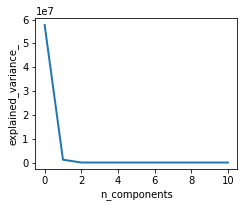

In [169]:
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [205]:
# This method will allow us to know how long running the model takes,
# each time it runs.
import datetime
from datetime import timedelta

from IPython.display import Audio
sound_file = 'ring.wav'

def timediff(s1,s2):
    datetimeFormat = '%H:%M:%S'
    diff = datetime.datetime.strptime(str(s2), datetimeFormat)\
        - datetime.datetime.strptime(str(s1), datetimeFormat)
    return diff

In [209]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
s1

'13:41:51'

In [ ]:
# n_components = [1,2,3]
# Cs = np.logspace(-4, 4, 3)

param_grid = [    
    {'logistic__penalty' : ['l1','l2', 'elasticnet', 'none'],
    'logistic__C' : np.logspace(-4, 4, 20),
    'logistic__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'logistic__max_iter' : [100, 1000,2500, 5000]
    }
]

estimator = GridSearchCV(pipe,param_grid,cv=2, scoring='accuracy', verbose=True, n_jobs=-1)
estimator.fit(X_train, y_train)

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignor

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignor

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Use

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\siva_\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. Th

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, 

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib

C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\siva_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got el

In [ ]:
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
print("\n\nElapsed time (HH:MM:SS): ", timediff(s1,s2))

Audio(sound_file, autoplay=True)

In [191]:
# max(estimator.param_grid.get('pca__n_components'))

TypeError: 'NoneType' object is not iterable

In [201]:
estimator.best_params_

{'logistic__C': 0.0001, 'logistic__penalty': 'l2'}

In [202]:
# build-in CV results keys
sorted(estimator.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_logistic__C',
 'param_logistic__penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [203]:
# test score for the 20 decision tree models
estimator.cv_results_['mean_test_score']

array([0.27429637, 0.27432777, 0.27429637, 0.27429637, 0.27429637,
       0.27429637])

In [204]:
# best model test score
estimator.best_score_

0.2743277723258096

In [ ]:
print (f'Accuracy - : {estimator.score(X,y):.3f}')

In [182]:
estimator.best_estimator_.named_steps['pca'].n_components

1

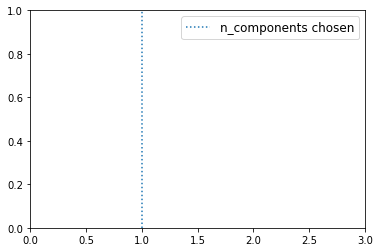

In [183]:
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
# plt.axvline(estimator.param_grid.get('pca__n_components'),
            linestyle=':', label='n_components chosen')
plt.xlim(0, max(estimator.param_grid.get('pca__n_components')))
plt.legend(prop=dict(size=12))
plt.show()